In [1]:
import io
import fitz
from PIL import Image, ImageOps
import pytesseract

In [2]:
zoom = 4
mat = fitz.Matrix(zoom, zoom)
config = r'--oem 3 --psm 6'

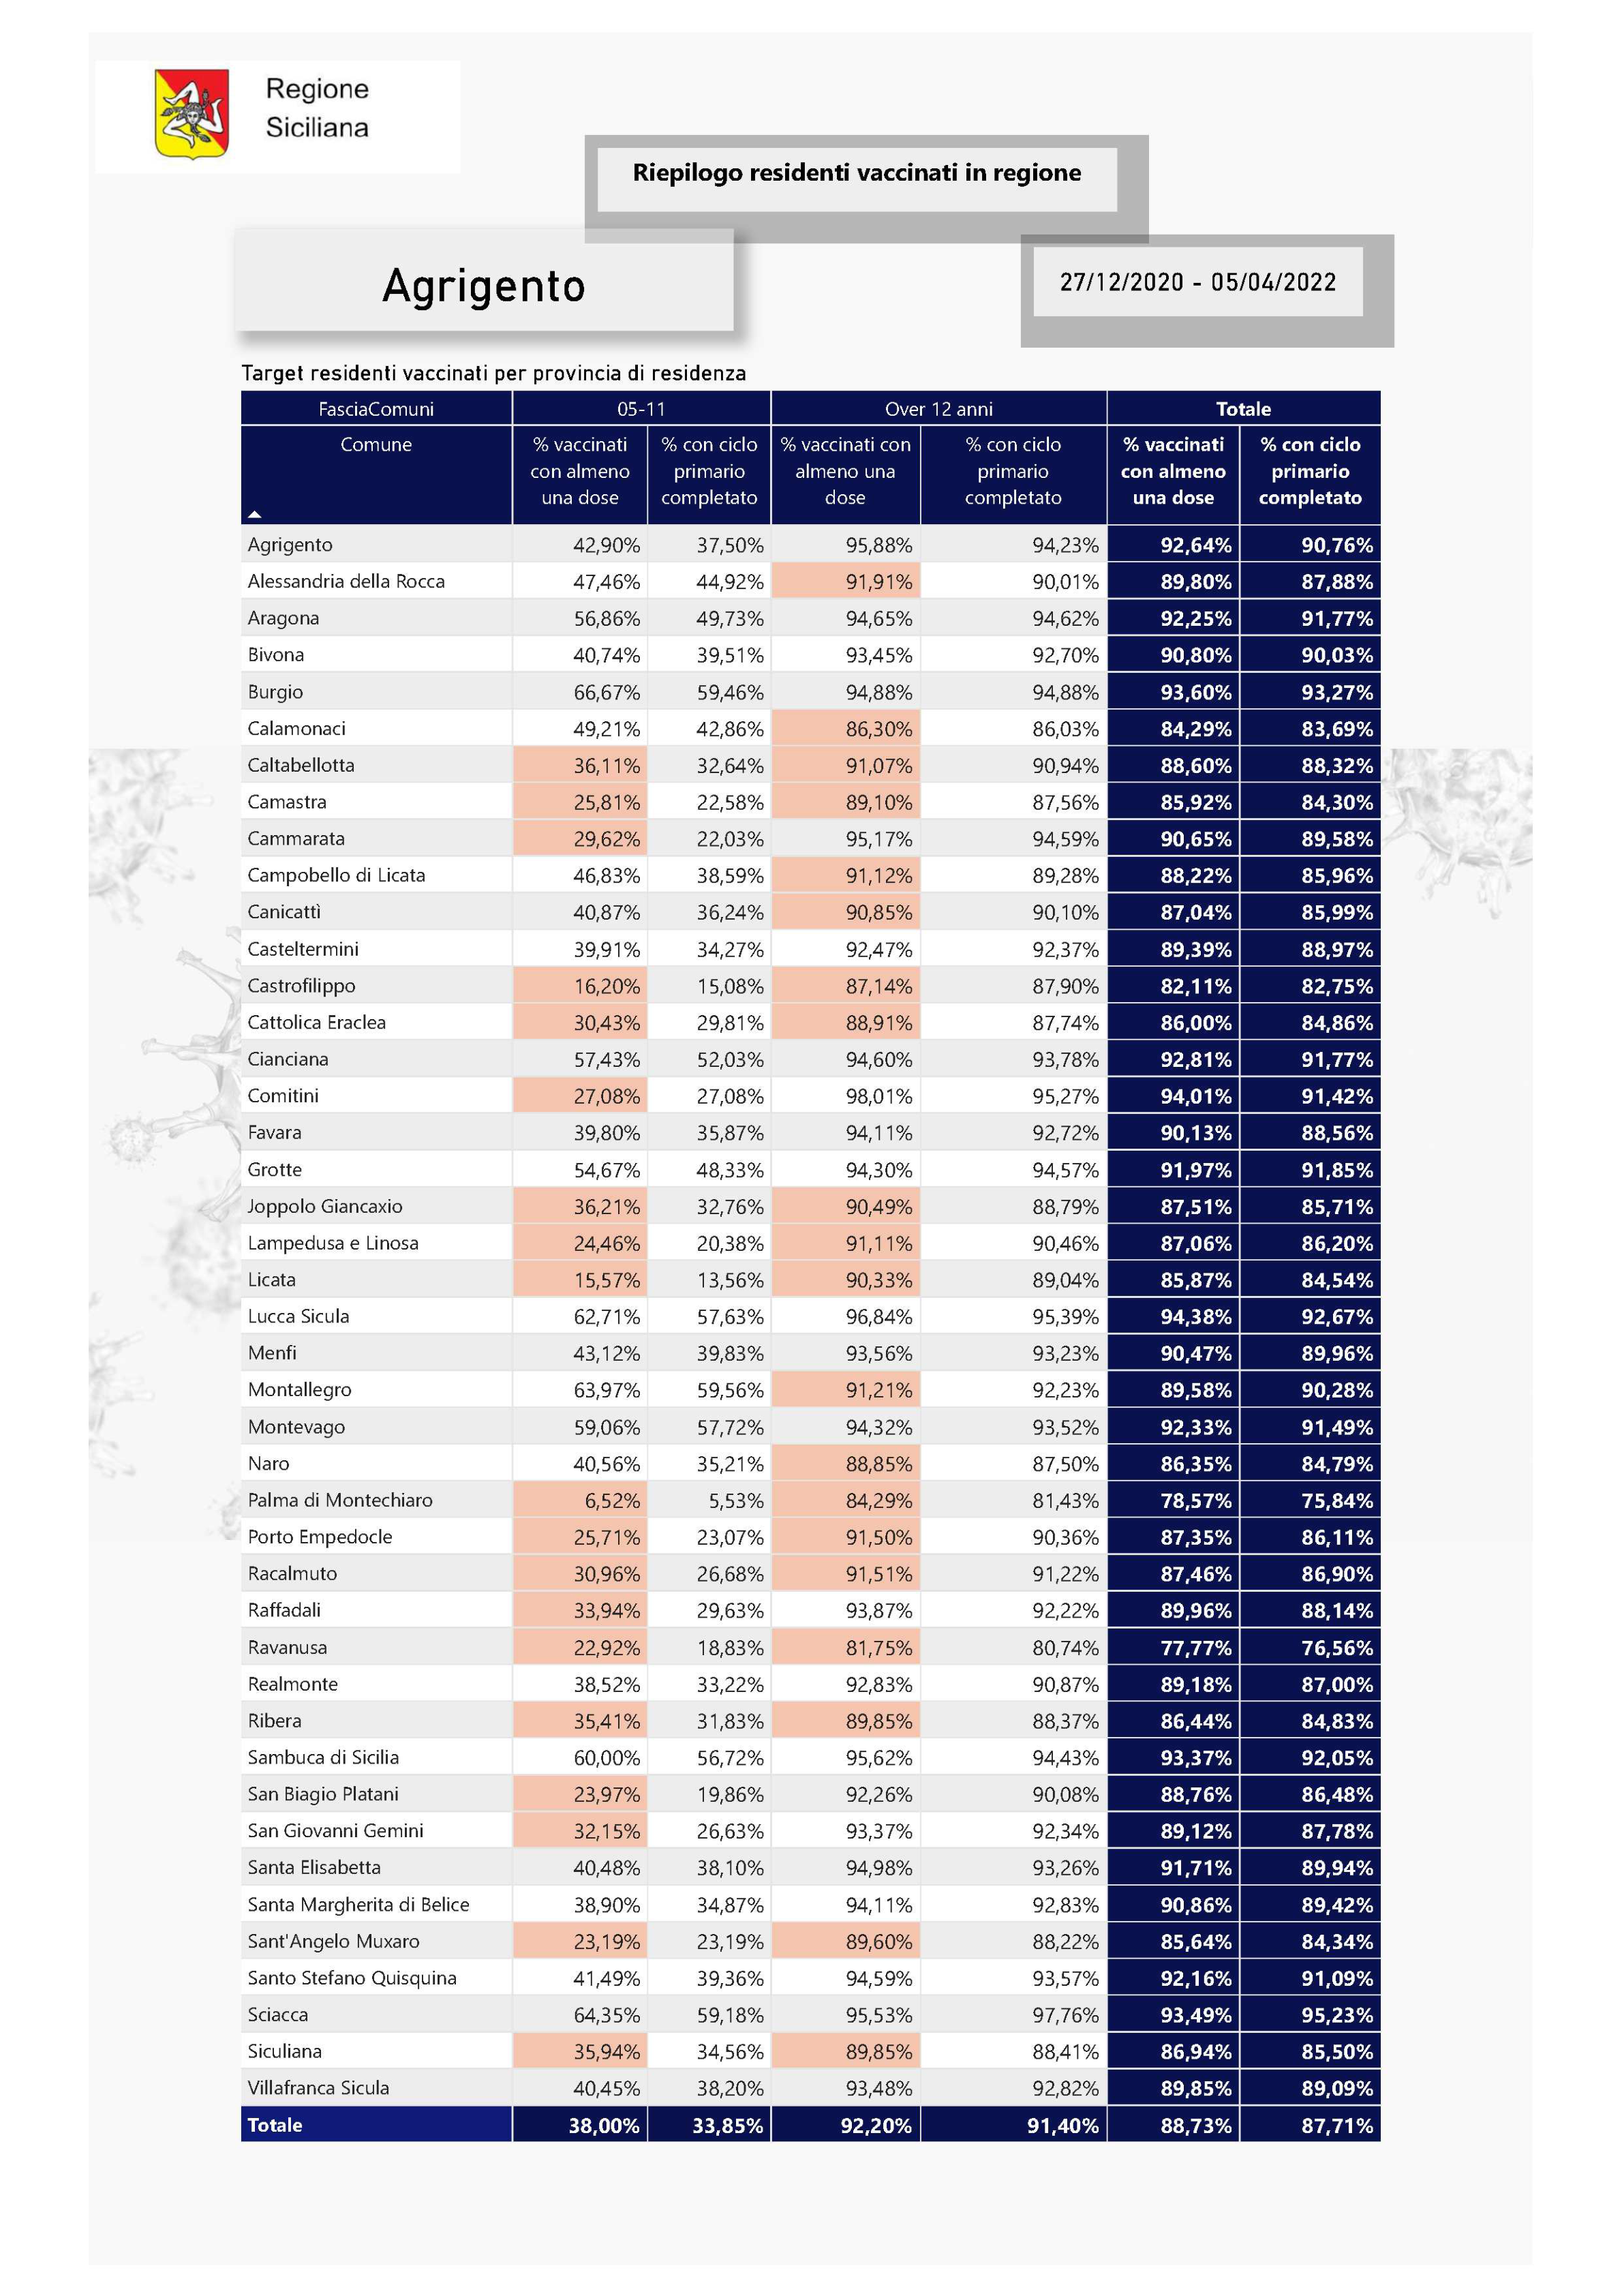

A Regione
<Î’“ Siciliana
Riepilogo residenti vaccinati in regione
L U
Ag rigento 27/12/2020 - 05/04/2022
Target residenti vaccinati per provincia di residenza
con almeno primario almeno una primario con almeno primario

i una dose completato lerotS completato DTT [ [T t)
Agrigento 42,90% — 37,50% 95,88% 94,23%
Alessandria della Rocca 4746% — 44,92% 91,91% 90,01%
Aragona 56,86% — 49,73% 94,65% 94,62%
Bivona 40,74% — 39,51% 93,45% 92,70%
Burgio 66,67% — 59,46% 94,88% 94,88%
Calamonaci 4921% — 42,86% 86,30% 86,03%
Caltabellotta 36,11% — 32,64% 91,07% 90,94%
Camastra 25,81% — 22,58% 89,10% 87,56%
Cammarata 29,62% — 22,03% 95,17% 94,59%
Campobello di Licata 46,83% — 38,59% 91,12% 89,28%
Canicattì 40,87% — 36,24% 90,85% 90,10%
Casteltermini 39,91% 34,27% 92,47% 92,37%
Castrofilippo 16,20% — 15,08% 87,14% 87,90%
Cattolica Eraclea 30,43% _ 29,81% 88,91% 87,74%
Cianciana 5743% — 52,03% 94,60% 93,78%
Comitini 27,08% — 27,08% 98,01% 95,27%
Favara 39,80% — 35,87% 94,11% 92,72%
Grotte 54,67% — 48,3

In [3]:
def read(file, pageNumber):
    pdf = fitz.open(file)
    page = pdf.load_page(pageNumber)
    pixmap = page.get_pixmap(alpha=True, matrix=mat).tobytes()
    image = Image.open(io.BytesIO(pixmap))
    display(image)
    results = pytesseract.image_to_string(image, lang="ita", config=config)
    print(results)

read('./data/report.pdf', 0)

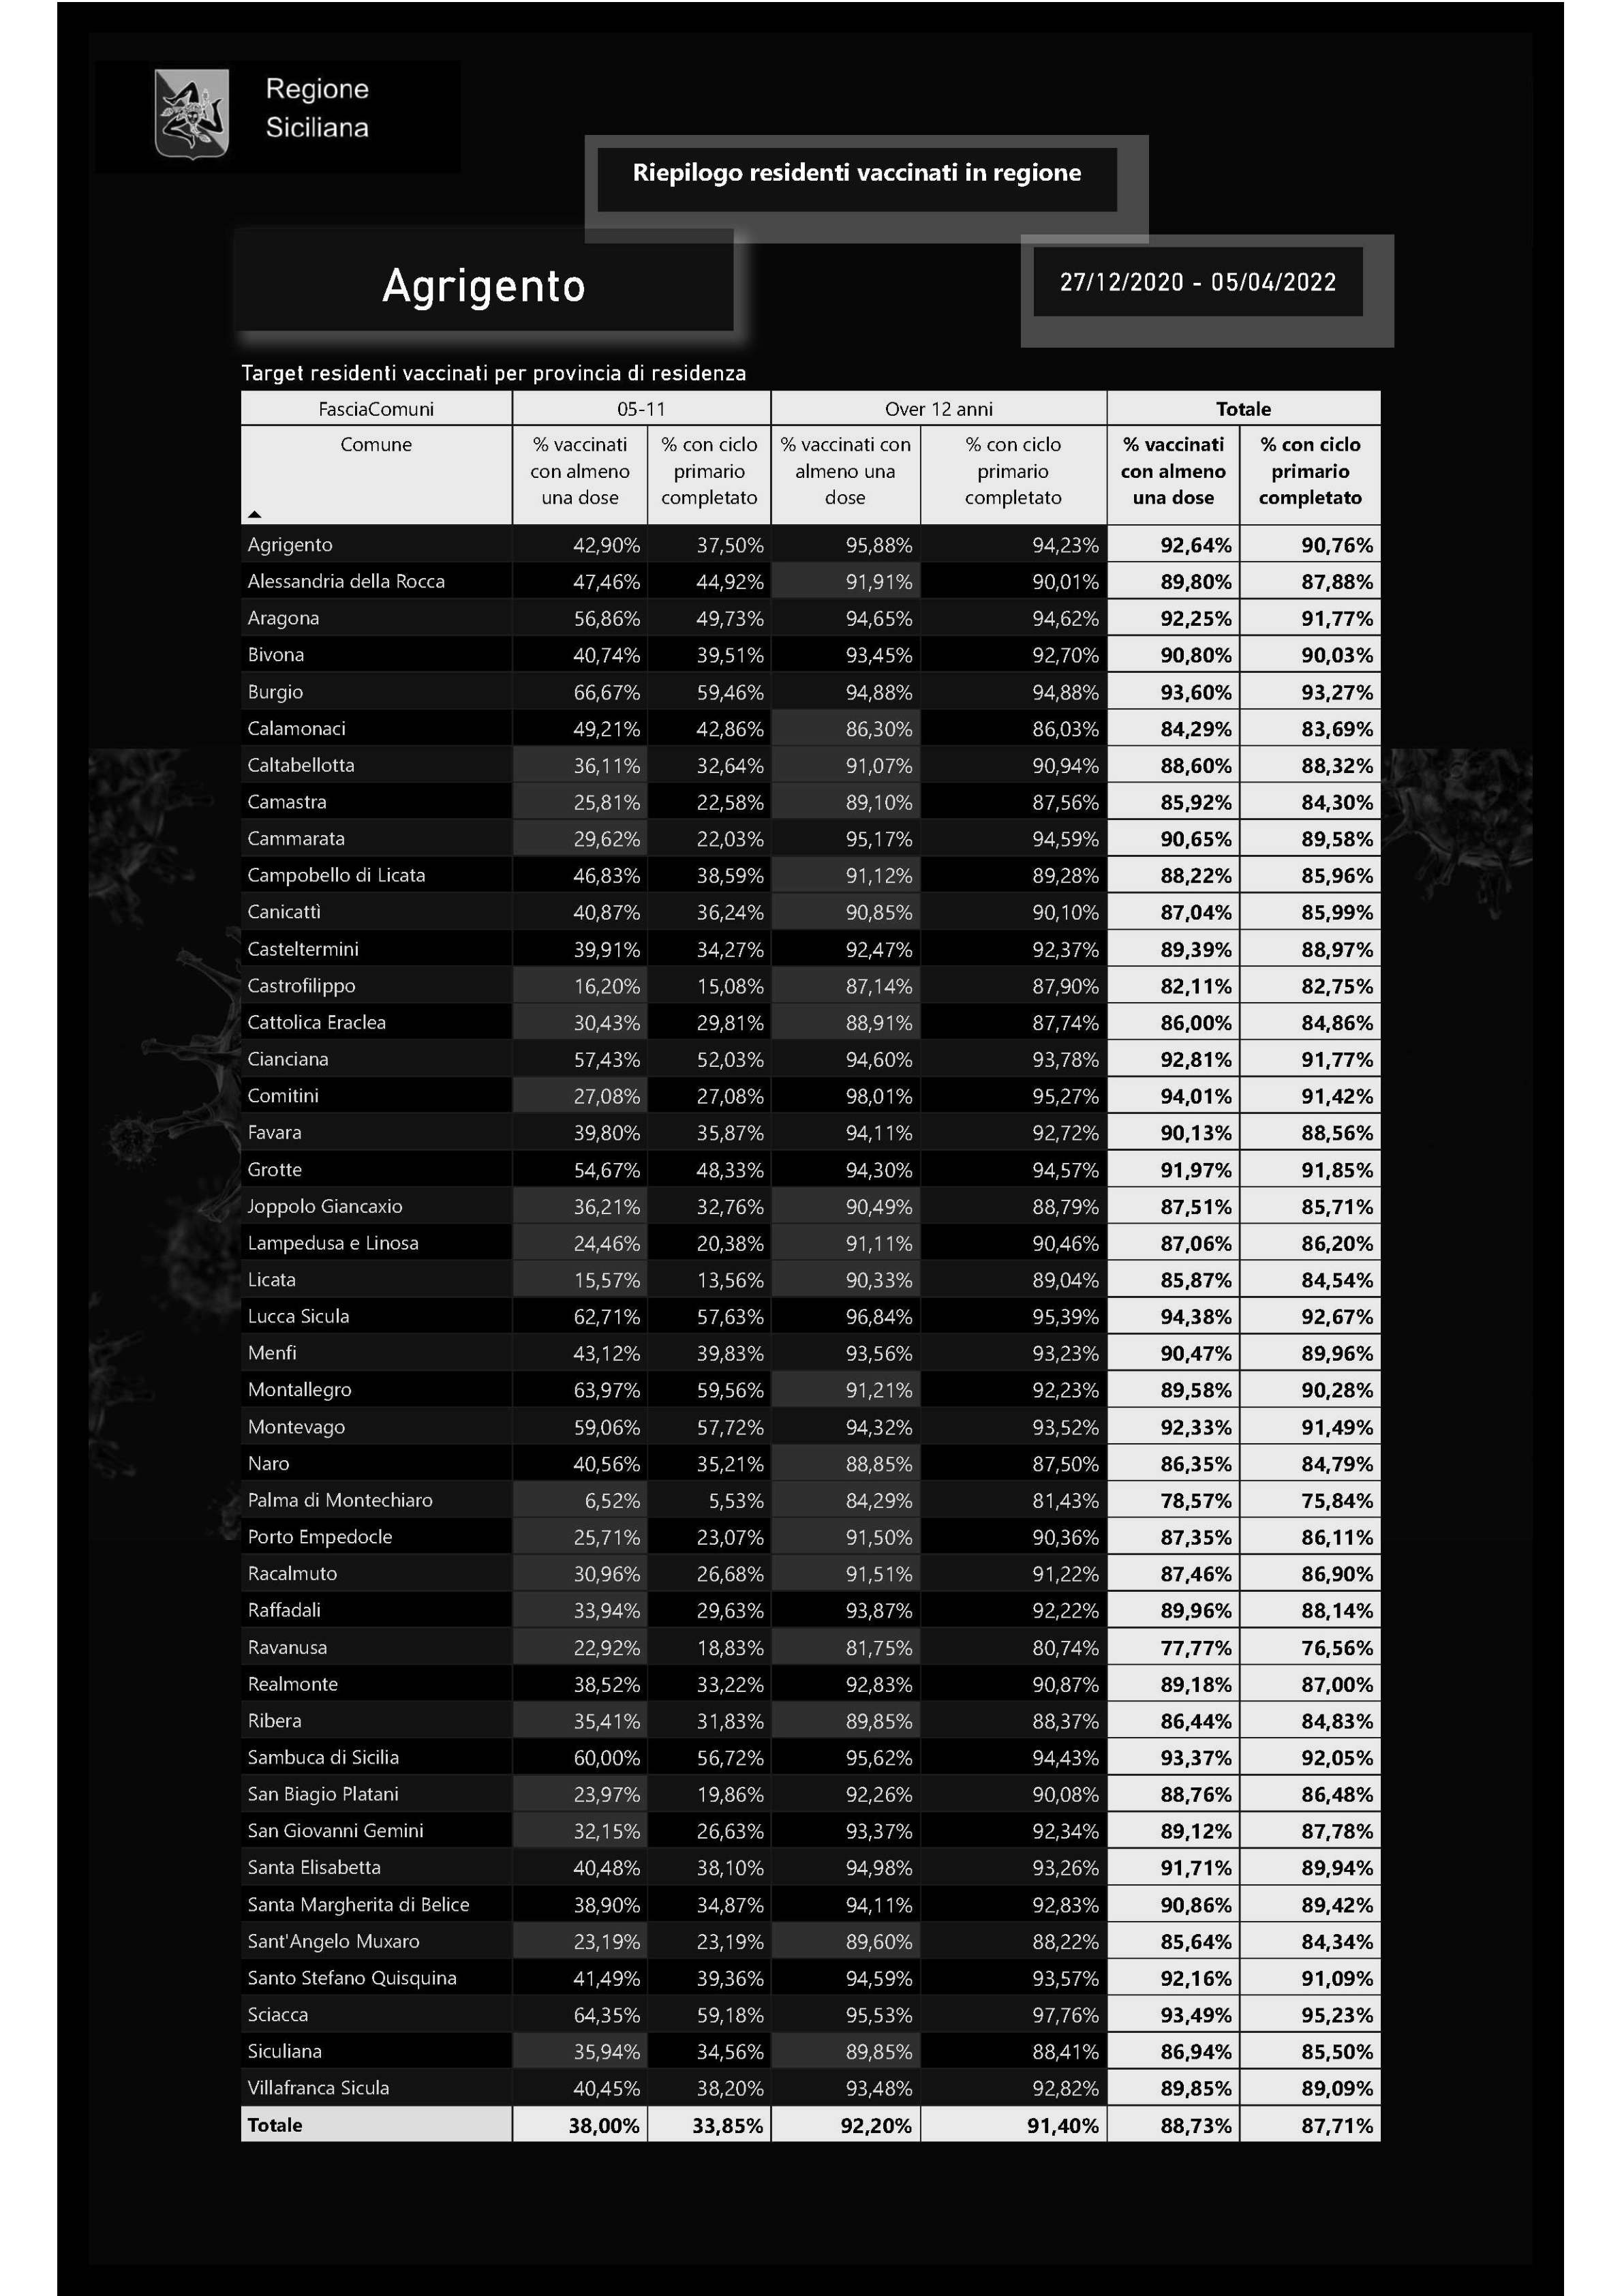

Regione
= Siciliana
n Riepilogo residenti vaccinati in regione
Agrigento 27/12/2020 - 05/04/2022
Target residenti vaccinati per provincia di residenza
con almeno primario almeno una primario con almeno primario

a una dose completato dose completato una dose completato
Agrigento 42,90% — 37,50% EE 94,23%
PA PPC AN RA EN
PA SI: NE ERT EU
EA OZE 93,45% PO
E IT RA PNA
Calamonaci 4921% — 42,86% 86,30% 86,03%
l 36,11% — 32,64% ER EI
[ PS:S 89,10% 87,56%
AA ENI E EU
[TT 46,83% — 38,59% FI Fa
RA IO EZ 90,85% EI
eS S 2S oalial 39,91% 34,27% 92,47% PT
Castrofilippo AE 87,14% 87,90%
Cattolica Eraclea 3043%  29,81% 88,91% EA
eEA EEE ER 93,78%
Comitini 27,08% — 27,08% RR EE
AA E E RR PZ
ra PI EE 94,30% EE
SAN 36,21% — 32,76% 90,49% FL
Lampedusa e Linosa 24,46% 20,38% 91,11% O:3
a 15,57% — 13,56% 90,33% 89,04%
AEST ZAA IA 95,39%
A ER E:E ERT 93,23%
aa EE FI 92,23%
AA 59,06% — 57,72% 94,32% 93,52%
r 40,56% — 35,21% ER 87,50%
AE A EN EI 81,43%
Porto Empedocle 25,71% 23,07% ISPT0 SOT
AAT 30,96% — 26,6

In [4]:
def readReplaceColor(file, pageNumber):
    pdf = fitz.open(file)
    page = pdf.load_page(pageNumber)
    pixmap = page.get_pixmap(alpha=True, matrix=mat).tobytes()
    image = Image.open(io.BytesIO(pixmap))
    '''Questo teoricamente cambiava il colore ma con troppa compressione non funziona piu'''
#     width = image.size[0]
#     height = image.size[1]
#     for x in range(0, width):
#         for y in range(0, height):
#             data = image.getpixel((x, y))
#             if (data[0] == 8 and data[1] == 16 and data[2] == 78):
#                 image.putpixel((x, y), (0, 0, 0))
    image = ImageOps.invert(image.convert('L'))
    display(image)
    results = pytesseract.image_to_string(image, lang="ita", config=config)
    print(results)
    
readReplaceColor('./data/report.pdf', 0)